In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/legoses/Library/CloudStorage/GoogleDrive-nelsonla@byui.edu/My Drive/Lance/PH135/textbook/chapters':
  os.chdir(r'/Users/legoses/Library/CloudStorage/GoogleDrive-nelsonla@byui.edu/My Drive/Lance/PH135/textbook/chapters')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap_external.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipimport.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/codecs.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/aliases.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/__init__.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/utf_8.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.

/var/folders/l7/qksjftz12pz0s32y0l3jd4k4cyyb65/T/ipykernel_11313/4212331884.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
from pandas import read_csv

elevator_data = read_csv("elevator.csv",index_col = 0)
print(elevator_data)

    time     gFx     gFy     gFz
0  0.007 -0.0056 -0.0046  1.0120
1  0.008  0.0070  0.0024  1.0022
2  0.008  0.0000  0.0059  1.0039
3  0.009  0.0054 -0.0022  1.0032
4  0.009 -0.0015 -0.0056  1.0042
5  0.009  0.0037 -0.0020  0.9951
6  0.010 -0.0020 -0.0020  1.0020
7  0.014  0.0090 -0.0025  1.0159
8  0.015  0.0012 -0.0037  1.0100
9  0.017 -0.0115 -0.0020  1.0012


In [3]:
from pandas import read_csv

elevator_data = read_csv("elevator.csv",index_col = 0)
elevator_data = elevator_data.rename(index = {0:"A",1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",7:"H",8:"I",9:"J"})
print(elevator_data)

    time     gFx     gFy     gFz
A  0.007 -0.0056 -0.0046  1.0120
B  0.008  0.0070  0.0024  1.0022
C  0.008  0.0000  0.0059  1.0039
D  0.009  0.0054 -0.0022  1.0032
E  0.009 -0.0015 -0.0056  1.0042
F  0.009  0.0037 -0.0020  0.9951
G  0.010 -0.0020 -0.0020  1.0020
H  0.014  0.0090 -0.0025  1.0159
I  0.015  0.0012 -0.0037  1.0100
J  0.017 -0.0115 -0.0020  1.0012


In [4]:
from pandas import DataFrame
elevator = {"time":[0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017],"gFx":[-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115],"gFy":[-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002],"gFz":[1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]}
elevator_data = DataFrame(elevator)
print(elevator_data)

    time     gFx     gFy     gFz
0  0.007 -0.0056 -0.0046  1.0120
1  0.008  0.0070  0.0024  1.0022
2  0.008  0.0000  0.0059  1.0039
3  0.009  0.0054 -0.0022  1.0032
4  0.009 -0.0015 -0.0056  1.0042
5  0.009  0.0037 -0.0020  0.9951
6  0.010 -0.0020 -0.0020  1.0020
7  0.014  0.0090 -0.0025  1.0159
8  0.015  0.0012 -0.0037  1.0100
9  0.017 -0.0115 -0.0020  1.0012


In [5]:
from pandas import DataFrame
elevator = {"time":[0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017],"gFx":[-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115],"gFy":[-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002],"gFz":[1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]}
elevator_data = DataFrame(elevator,index = ["A","B","C","D","E","F","G","H","J","K"])
print(elevator_data)

    time     gFx     gFy     gFz
A  0.007 -0.0056 -0.0046  1.0120
B  0.008  0.0070  0.0024  1.0022
C  0.008  0.0000  0.0059  1.0039
D  0.009  0.0054 -0.0022  1.0032
E  0.009 -0.0015 -0.0056  1.0042
F  0.009  0.0037 -0.0020  0.9951
G  0.010 -0.0020 -0.0020  1.0020
H  0.014  0.0090 -0.0025  1.0159
J  0.015  0.0012 -0.0037  1.0100
K  0.017 -0.0115 -0.0020  1.0012


In [6]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"])

In [7]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

In [8]:
elevator_data.head(3)
elevator_data.tail(4)

,time,gFx,gFy,gFz
G,0.010,-0.0020,-0.0020,1.0020
H,0.014,0.0090,-0.0025,1.0159
J,0.015,0.0012,-0.0037,1.0100
K,0.017,-0.0115,-0.0020,1.0012


In [9]:
elevator_data.columns
elevator_data.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K'], dtype='object')

In [10]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.at["A","time"]
elevator_data.iat[0,0]


0.007

In [11]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.loc["A"]
elevator_data.iloc[0]  

time    0.0070
gFx    -0.0056
gFy    -0.0046
gFz     1.0120
Name: A, dtype: float64

In [12]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.loc["A":"D"]
elevator_data.iloc[0:4]  

,time,gFx,gFy,gFz
A,0.007,-0.0056,-0.0046,1.0120
B,0.008,0.0070,0.0024,1.0022
C,0.008,0.0000,0.0059,1.0039
D,0.009,0.0054,-0.0022,1.0032


In [13]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.loc["A":"D","time":"gFy"]
elevator_data.iloc[0:4,0:2]  

,time,gFx
A,0.007,-0.0056
B,0.008,0.0070
C,0.008,0.0000
D,0.009,0.0054


In [14]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data[elevator_data["time"] < 0.01]  # Slice only the rows where time < 0.01

,time,gFx,gFy,gFz
A,0.007,-0.0056,-0.0046,1.0120
B,0.008,0.0070,0.0024,1.0022
C,0.008,0.0000,0.0059,1.0039
D,0.009,0.0054,-0.0022,1.0032
E,0.009,-0.0015,-0.0056,1.0042
F,0.009,0.0037,-0.0020,0.9951


In [15]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = ["time", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.query("time > 0.008 and gFz > 1")

,time,gFx,gFy,gFz
D,0.009,0.0054,-0.0022,1.0032
E,0.009,-0.0015,-0.0056,1.0042
G,0.010,-0.0020,-0.0020,1.0020
H,0.014,0.0090,-0.0025,1.0159
J,0.015,0.0012,-0.0037,1.0100
K,0.017,-0.0115,-0.0020,1.0012


In [16]:
from pandas import DataFrame
from numpy import transpose

time = [0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017]
gFx = [-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115]
gFy = [-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002]
gFz = [1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012]
elevator_data = DataFrame(transpose([time,gFx,gFy,gFz]),columns = [" time-s", "gFx","gFy", "gFz"],index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.query("` time-s` > 0.008 and gFz > 1")

,time-s,gFx,gFy,gFz
D,0.009,0.0054,-0.0022,1.0032
E,0.009,-0.0015,-0.0056,1.0042
G,0.010,-0.0020,-0.0020,1.0020
H,0.014,0.0090,-0.0025,1.0159
J,0.015,0.0012,-0.0037,1.0100
K,0.017,-0.0115,-0.0020,1.0012


In [17]:
from pandas import DataFrame
from numpy import transpose

dataDict = {" time-s":[0.007,0.008,0.008,0.009,0.009,0.009,0.01,0.014,0.015,0.017], "gFx":[-0.0056,0.007,0,0.0054,-0.0015,0.0037,-0.002,0.009,0.0012,-0.0115],"gFy":[-0.0046,0.0024,0.0059,-0.0022,-0.0056,-0.002,-0.002,-0.0025,-0.0037,-0.002],"gFz":[1.012,1.0022,1.0039,1.0032,1.0042,0.9951,1.002,1.0159,1.01,1.0012], "Here":["Yes","Yes","No","No","Yes","No","Yes","No","Yes","No"]}

elevator_data = DataFrame(dataDict,index = ["A","B","C","D","E","F","G","H","J","K"])

elevator_data.query('` time-s` > 0.008 and Here == "No"')

,time-s,gFx,gFy,gFz,Here
D,0.009,0.0054,-0.0022,1.0032,No
F,0.009,0.0037,-0.0020,0.9951,No
H,0.014,0.0090,-0.0025,1.0159,No
K,0.017,-0.0115,-0.0020,1.0012,No


In [18]:
from numpy import sqrt

elevator_data[["gFx", "gFy", "gFz"]] *= 9.8
a_magnitude  = sqrt(elevator_data[["gFx", "gFy", "gFz"]]**2).sum(axis = 1)

max_accel = a_magnitude.max()

elevator_data

,time-s,gFx,gFy,gFz,Here
A,0.007,-0.05488,-0.04508,9.91760,Yes
B,0.008,0.06860,0.02352,9.82156,Yes
C,0.008,0.00000,0.05782,9.83822,No
D,0.009,0.05292,-0.02156,9.83136,No
E,0.009,-0.01470,-0.05488,9.84116,Yes
F,0.009,0.03626,-0.01960,9.75198,No
G,0.010,-0.01960,-0.01960,9.81960,Yes
H,0.014,0.08820,-0.02450,9.95582,No
J,0.015,0.01176,-0.03626,9.89800,Yes
K,0.017,-0.11270,-0.01960,9.81176,No


In [19]:
elevator_data["a_mag"]  = sqrt( (elevator_data[["gFx", "gFy", "gFz"]]**2).sum(axis = 1))

In [20]:
from pandas import DataFrame,concat

to_add = DataFrame({" time-s":0.02,"gFx":-0.028,"gFy":0.018,"gFz":1.028},index = ["L"]) # Build the dataframe to be added.
final = concat([elevator_data,to_add])  # Append using a dictionary.

elevator_data2 = DataFrame({"time":[0.02,0.025],"gFx":[-0.028,-0.022],"gFy":[0.018,-0.012],"gFz":[1.028,1.042]})

final2 = concat([elevator_data,to_add,elevator_data2]) #Combine all three data frames into one.

In [21]:
elevator_data.describe()

,time-s,gFx,gFy,gFz,a_mag
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.010600,0.005586,-0.015974,9.848706,9.848937
std,0.003438,0.060314,0.033201,0.059088,0.059124
min,0.007000,-0.112700,-0.054880,9.751980,9.752067
25%,0.008250,-0.018375,-0.033320,9.820090,9.820186
50%,0.009000,0.005880,-0.020580,9.834790,9.834958
75%,0.013000,0.048755,-0.019600,9.883790,9.883886
max,0.017000,0.088200,0.057820,9.955820,9.956241


array([[<Axes: title={'center': ' time-s'}>,
        <Axes: title={'center': 'gFx'}>],
       [<Axes: title={'center': 'gFy'}>, <Axes: title={'center': 'gFz'}>],
       [<Axes: title={'center': 'a_mag'}>, <Axes: >]], dtype=object)

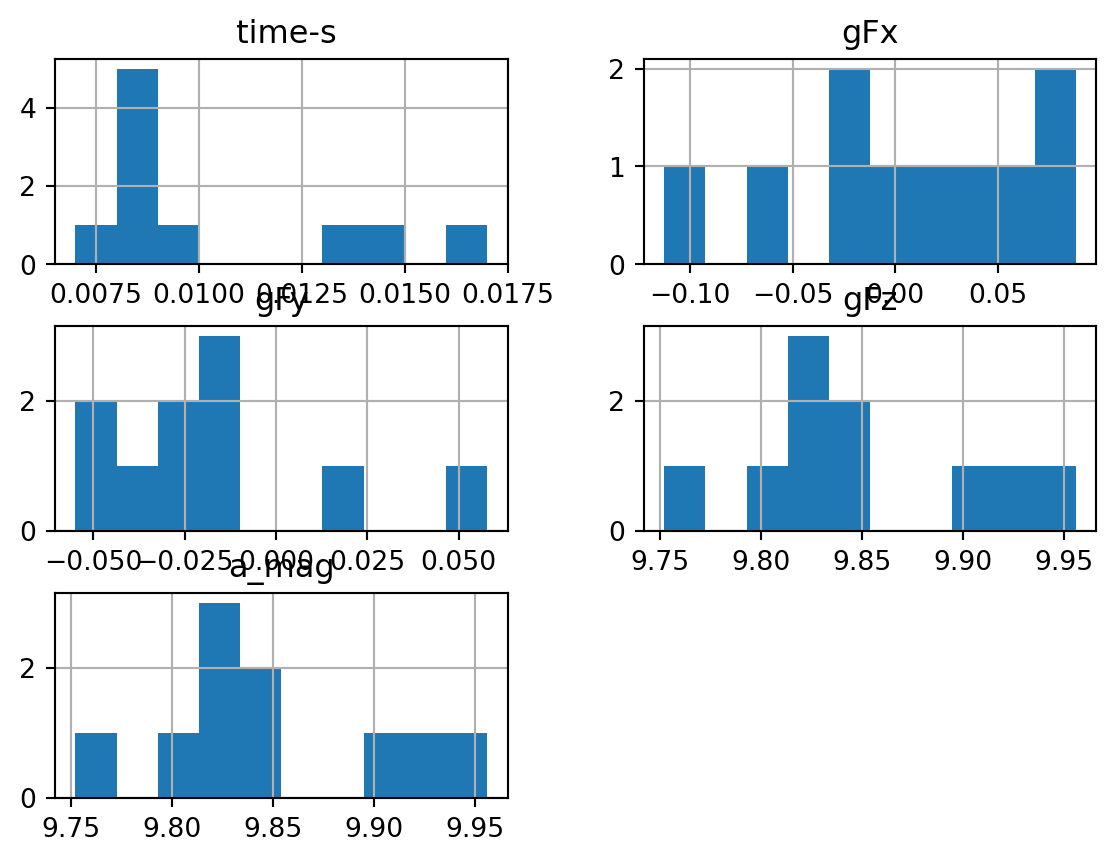

In [22]:
elevator_data.hist()

<Axes: xlabel=' time-s', ylabel='gFz'>

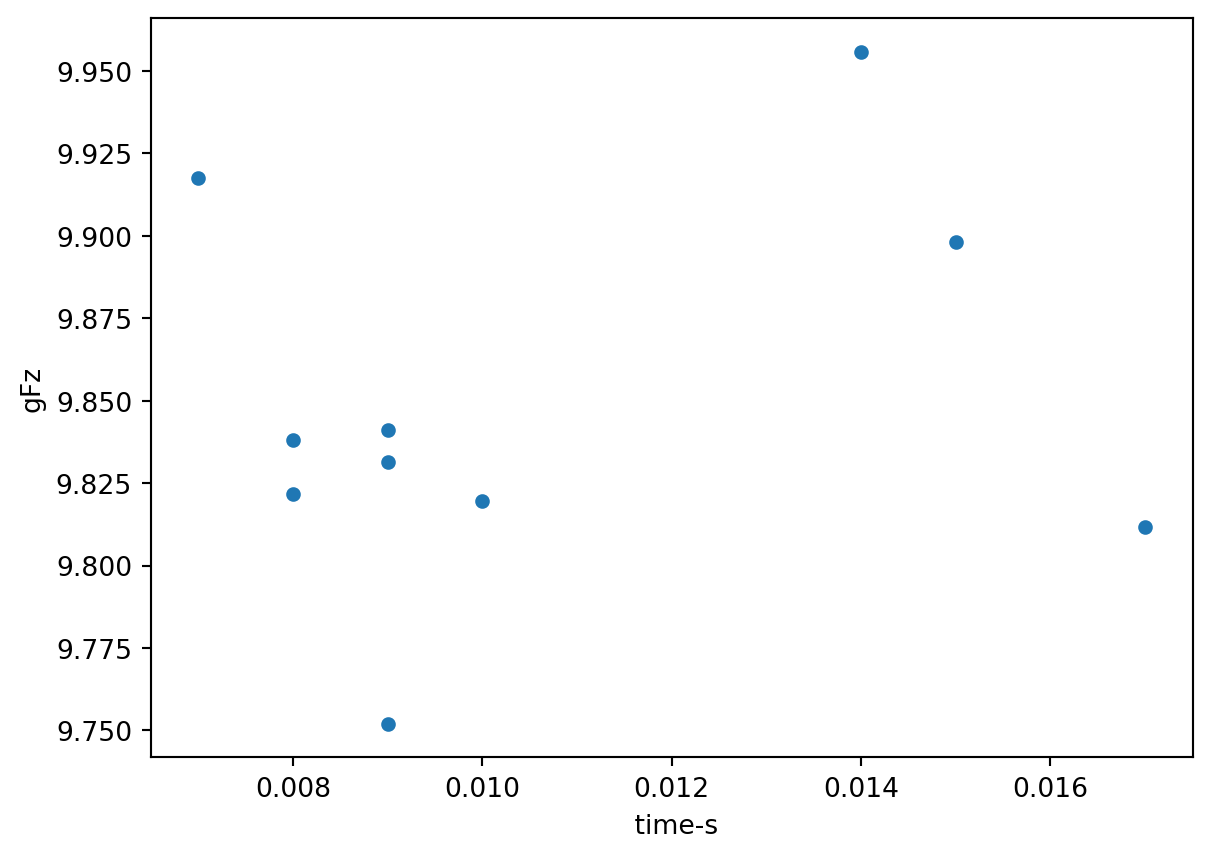

In [23]:
elevator_data.plot.scatter(x = " time-s", y = "gFz")

<Axes: >

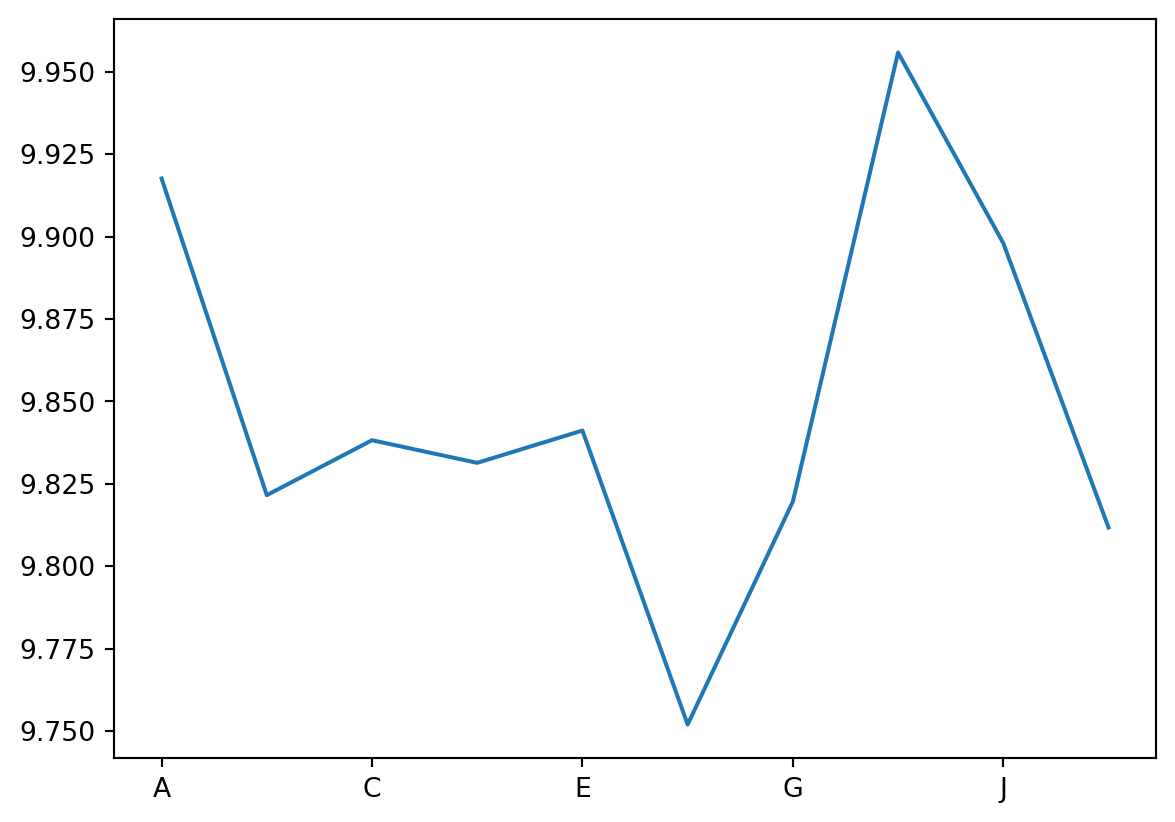

In [24]:
elevator_data["gFz"].plot()

<Axes: >

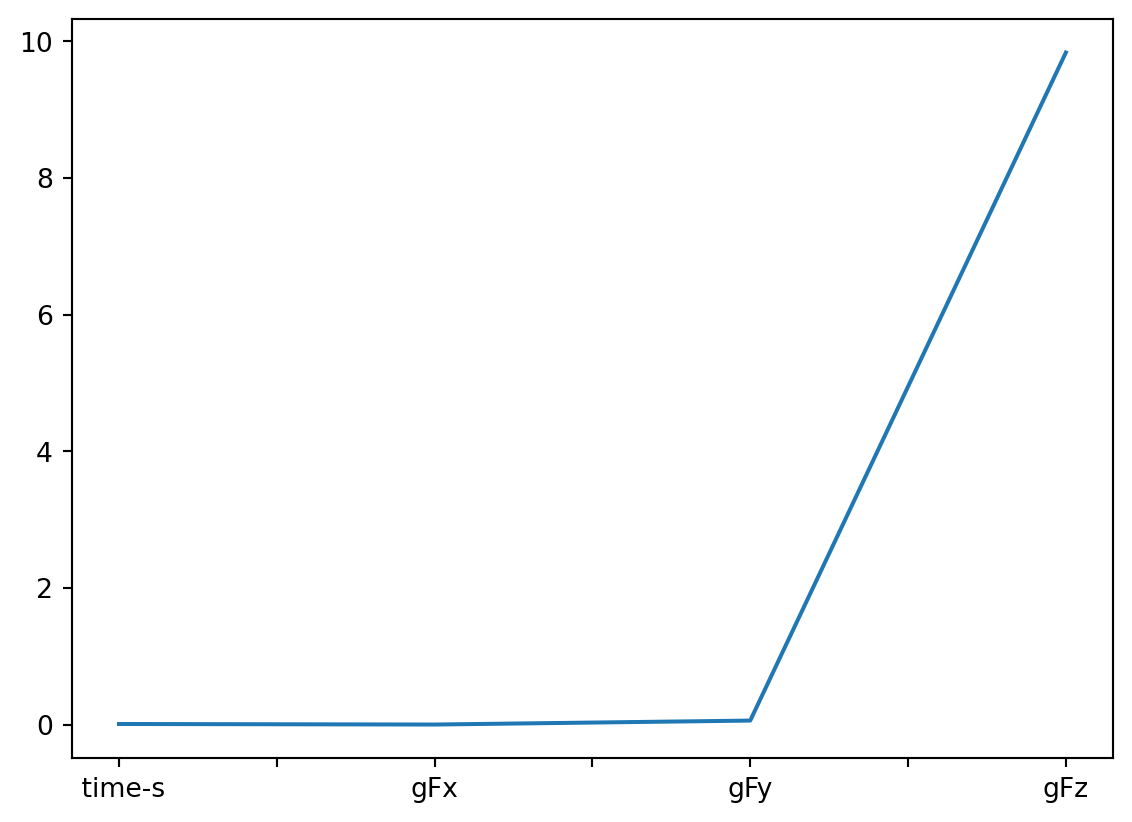

In [25]:
elevator_data.iloc[2][[" time-s","gFx","gFy","gFz"]].plot()

In [26]:
elevator_data.to_csv("myelevatorData.csv")